In [1]:
# this is a reviewing notebook for the newly trained model called "model_45.pth"

# import necessary packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time

from dataset import TinyImageNet

In [58]:
import torchvision.models as models

In [67]:
# import cudnn
import torch.backends.cudnn as cudnn

In [143]:
# import the pth data, which was trained on 4 GPUs. make it run on CPU
device = torch.device("cpu")
save_path = "./model_45.pth"

net = models.resnet18(pretrained = False, num_classes = 200)

cudnn.benchmark = True

# load the model trained on 4 GPUs
net.load_state_dict({k.replace('module.',''):v for k,v in torch.load(save_path, map_location = device).items()})

<All keys matched successfully>

In [136]:
# load the test dataset
testset = TinyImageNet(root='/Users/royalty/Desktop/Python_ML/Python-DL/second_assignment/tiny-imagenet-200', train=False, transform=transforms.ToTensor())

# load the test dataset into a dataloader
testloader = torch.utils.data.DataLoader(testset, batch_size=1, num_workers=2)

In [149]:
# import the classes of tiny-imagenet-200
# classes = []
# with open("/Users/royalty/Desktop/Python_ML/Python-DL/second_assignment/tiny-imagenet-200/wnids.txt", "r") as f:
#     for line in f:
#         classes.append(line.strip("\n"))

In [151]:
# import the class names
classes = []
with open('/Users/royalty/Desktop/Python_ML/Python-DL/second_assignment/tiny-imagenet-200/words.txt', 'r') as f:
    for line in f:
        classes.append(line.strip().split('\t')[1])
        
# define a function to show the image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()     # convert the image to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # transpose the image to the right format
    plt.show()
    
# define a function to show the prediction result
def show_result(img, label, prediction):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()     # convert the image to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # transpose the image to the right format
    plt.title('Label: ' + classes[label] + '   Prediction: ' + classes[prediction])
    plt.show()

In [137]:
len(classes)

82115

In [138]:
# import an image from the test dataset
dataiter = iter(testloader)

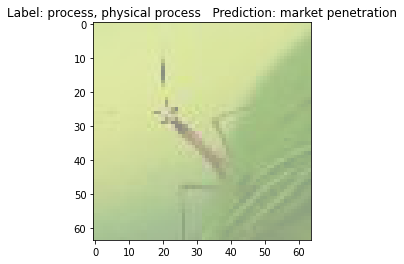

In [162]:
# show the image
images, labels = dataiter.next()

# show the prediction result
show_result(torchvision.utils.make_grid(images), labels, net(images).argmax())


In [154]:
print(labels,net(images).argmax())

tensor([135]) tensor(80)


tensor([107])
